# Linear Regression - Financial data 

* Project: Venture capitalist trying to decide which company they should invest in out of 50 companies. They have given data of companies location, expences and profits. Based on this data they looking for suggestion 
* Project Scope: Analyze,Visualize, apply Linear Regression model and conclude with suggestion
* Data source: 50_Startups.csv
* The data contains the following columns:
    * 'R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'

## 1.Import libraries

In [29]:
# Lets first make sure we are in our working directory before we start our project
# Import Data Analysis libraries
import numpy as np
import pandas as pd

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

## 2. Load data

In [30]:
# Importing dataset
dataset = pd.read_csv('50_Startups.csv')

## 3. Let's analyze and visualize data

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


This gives information about features and its datatypes. Also we now know that there are 50 records in this dataset

In [32]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

We can see that we have features 'R&D Spend', 'Administration', 'Marketing Spend', 'State' and target variable 'Profit'

In [33]:
dataset.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


** Taking care of missing data, if any: **

In [34]:
dataset.isnull().sum()
# we can see the number of null records for each column

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

we dont have any null values in our dataset

** Adding features if necessary: **

we dont have any features to add

** Lets visualize data **

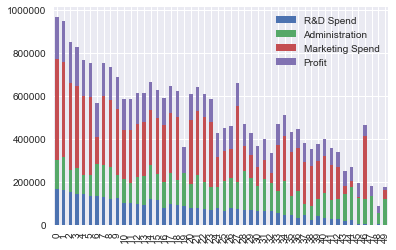

In [35]:
dataset.plot.bar(stacked =2)
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.title('Experience vs Salary')
plt.show()

** Things to note **
* Based on data we can see as R&D decreases, profits also decreasing with few exceptions
* All the the companies have Administration costs and got atleast some profit


## 4. Data Preprocessing

** a. Lets split dataset into features/inputs/independent variables(X) and output/target variable(y) **

In [36]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [37]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [38]:
y

array([ 192261.83,  191792.06,  191050.39,  182901.99,  166187.94,
        156991.12,  156122.51,  155752.6 ,  152211.77,  149759.96,
        146121.95,  144259.4 ,  141585.52,  134307.35,  132602.65,
        129917.04,  126992.93,  125370.37,  124266.9 ,  122776.86,
        118474.03,  111313.02,  110352.25,  108733.99,  108552.04,
        107404.34,  105733.54,  105008.31,  103282.38,  101004.64,
         99937.59,   97483.56,   97427.84,   96778.92,   96712.8 ,
         96479.51,   90708.19,   89949.14,   81229.06,   81005.76,
         78239.91,   77798.83,   71498.49,   69758.98,   65200.33,
         64926.08,   49490.75,   42559.73,   35673.41,   14681.4 ])

We now have feature matrix X and target vector y

** b. Categorical Data: **
* Lets check categorical variables in out data set both in features and also in output
* Then encode them into dummy variables 

We do have categorical feature 'state' in our dataset

In [39]:
# since last column in our features is categorical variable, lets encode it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#LabelEncoder converts the categorical variables into values between 0 and n_classes-1
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

#OneHotEncoder makesures data is encoded in categorical features
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [40]:
# now lets check features array
X

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


Since we got categorical column with 3 states categories, we got three dummy features. In the first row original features array, we can see state is 'New York' and after encoding, we can see the there is a value of 0 in two dummy variables and 1 in third variable.

**Avoiding Dummy variable trap: **
to avoid redundancy, we take out one dummy variable. So if there are n categories in categorical column, we need to have only n-1 dummy variables 


In [41]:
# We dont need to do this step manually, library will take care of it. 
X =  X[:,1:]
X

array([[  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
          1.36897800e+05,   4.71784100e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+05,
          1.51377590e+05,   4.43898530e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+05,
          1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+05,
          1.18671850e+05,   3.83199620e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.42107340e+05,
          9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.31876900e+05,
          9.98147100e+04,   3.62861360e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.34615460e+05,
          1.47198870e+05,   1.27716820e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.30298130e+05,
          1.45530060e+05,   3.23876680e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.20542520e+05,
          1.48718950e+05,   3.11613290e+05],
       [  0.00000000e+00,   0.0000000

We can now see that there are only two dummy variables

** c. Splitting Dataset into Training and Test sets: **
* Ideal split is 70/30 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [43]:
X_train

array([[  0.00000000e+00,   0.00000000e+00,   2.36409300e+04,
          9.61896300e+04,   1.48001110e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.16983800e+05,   4.51730600e+04],
       [  1.00000000e+00,   0.00000000e+00,   7.53288700e+04,
          1.44135980e+05,   1.34050070e+05],
       [  1.00000000e+00,   0.00000000e+00,   7.39945600e+04,
          1.22782750e+05,   3.03319260e+05],
       [  0.00000000e+00,   0.00000000e+00,   9.19923900e+04,
          1.35495070e+05,   2.52664930e+05],
       [  1.00000000e+00,   0.00000000e+00,   2.78929200e+04,
          8.47107700e+04,   1.64470710e+05],
       [  0.00000000e+00,   1.00000000e+00,   9.46571600e+04,
          1.45077580e+05,   2.82574310e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.00023000e+03,
          1.24153040e+05,   1.90393000e+03],
       [  0.00000000e+00,   1.00000000e+00,   7.70440100e+04,
          9.92813400e+04,   1.40574810e+05],
       [  1.00000000e+00,   0.0000000

In [44]:
X_test

array([[  0.00000000e+00,   1.00000000e+00,   7.21076000e+04,
          1.27864550e+05,   3.53183810e+05],
       [  0.00000000e+00,   1.00000000e+00,   4.60140200e+04,
          8.50474400e+04,   2.05517640e+05],
       [  0.00000000e+00,   0.00000000e+00,   2.87543300e+04,
          1.18546050e+05,   1.72795670e+05],
       [  0.00000000e+00,   1.00000000e+00,   2.02295900e+04,
          6.59479300e+04,   1.85265100e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.53441510e+05,
          1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.44372410e+05,
          1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   5.42050000e+02,
          5.17431500e+04,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   6.56054800e+04,
          1.53032060e+05,   1.07138380e+05],
       [  1.00000000e+00,   0.00000000e+00,   1.31546000e+03,
          1.15816210e+05,   2.97114460e+05],
       [  0.00000000e+00,   1.0000000

In [45]:
y_train

array([  71498.49,   14681.4 ,  105733.54,  110352.25,  134307.35,
         77798.83,  125370.37,   64926.08,  108552.04,  108733.99,
        166187.94,   96778.92,  132602.65,   99937.59,  146121.95,
        103282.38,   65200.33,   96712.8 ,  124266.9 ,  118474.03,
        107404.34,  156122.51,  155752.6 ,   42559.73,  191792.06,
        126992.93,  192261.83,  129917.04,  156991.12,  144259.4 ,
        149759.96,  152211.77,  141585.52,   69758.98,   89949.14])

In [46]:
y_test

array([ 105008.31,   96479.51,   78239.91,   81229.06,  191050.39,
        182901.99,   35673.41,  101004.64,   49490.75,   97483.56,
         97427.84,   81005.76,  111313.02,   90708.19,  122776.86])

After the split, we now have X_train, X_test, y_train, y_test

**d. Feature Scaling **
* we can do feature scaling by standardization or normalization
* we dont need to feature scaling for output variables in classification problems
* We dont need to do feature scaling manually, library will take care for us

## 7. Fitting Linear Regression Model to the Training set 

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 8. Predictions from our Model

Now we will use our X_test to see how our trained model will predict

In [48]:
y_pred = lr.predict(X_test)

In [49]:
y_pred

array([ 115325.09875884,   90638.08603371,   76019.13126601,
         70325.43761811,  179659.73982742,  172204.16410702,
         48850.65280977,  101321.43054259,   58316.95833317,
         97217.64504543,   98129.2000785 ,   84156.44747448,
        117923.69116309,   75866.34008184,  113595.93339161])

## 9. Evaluating the model

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [50]:
# print the intercept
print(lr.intercept_)

49472.1591765


In [53]:
coeff_df = pd.DataFrame(lr.coef_,columns=['Coefficient'])
coeff_df

,Coefficient
0,-956.828109
1,-306.310628
2,0.770712
3,-0.014165
4,0.035099


Lets plot graphs to visualize the Training and Test set results

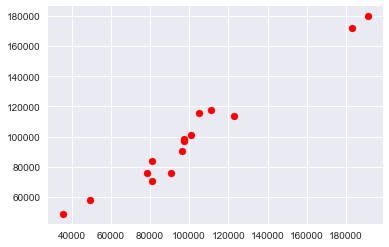

In [54]:
# Visualising the Test & pred set results
plt.scatter(y_test, y_pred, color = 'red')
plt.show()

** Residual Histogram **

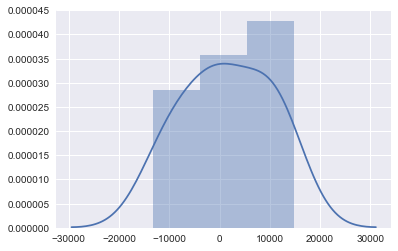

In [55]:
sns.distplot((y_test-y_pred));

** Regression Evaluation Metrics **

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7229.51611929
MSE: 74598131.6947
RMSE: 8637.02099654


## Checking if any statistically insignificant features using Backward Elimination & Adjusted R-Squared 

In [57]:
# adding X0 feature to our matrix of features X
X_new = np.append(arr=np.ones((50,1)).astype(int), values = X, axis=1)

In [58]:
SL = 0.05
X_opt = X_new[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           2.16e-31
Time:                        10:31:14   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

**In conclusion**

* Just as we noticed during visualization,'R&D Spend' feature is single most important feature in determining the profits. We can clearly see that every dollar spent on 'R&D', will increase 79 cents in Profits. 
* Also after Backward Elimination & R Squared is applied, we can see only significant features are X0 (which is constant), 'R&D Spend' and 'Marketing Spend'. All other features are statistically insignificant for our model
* With R-squared:0.950, Adj. R-squared:0.948 our linear regression model did fit well with the data.
* Also Adj. R-squared is pretty much equal to R-squared value. This indicates model did fit well with the data